# Loan Prediction Model

## Reading the Data and Importing Relevant Libraries

In [116]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
df = pd.read_csv(r"E:\internship\loan.csv")

In [3]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


## Performing Data Cleaning & EDA

In [4]:
# our data has 614 rows and 13 columns
df.shape

(614, 13)

In [5]:
# some of the columns contains null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
pd.set_option('display.max.rows',614)

In [7]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.000000,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.000000,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.000000,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.000000,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.000000,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.000000,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.000000,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.000000,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.000000,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.000000,349.0,360.0,1.0,Semiurban,N


In [8]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [9]:
# dropping null values from categorical columns with few rows which entails null values 
df.dropna(subset=['Gender', 'Married', 'Dependents', 'Education','Self_Employed'],axis = 0,inplace = True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 554 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            554 non-null    object 
 1   Gender             554 non-null    object 
 2   Married            554 non-null    object 
 3   Dependents         554 non-null    object 
 4   Education          554 non-null    object 
 5   Self_Employed      554 non-null    object 
 6   ApplicantIncome    554 non-null    int64  
 7   CoapplicantIncome  554 non-null    float64
 8   LoanAmount         535 non-null    float64
 9   Loan_Amount_Term   542 non-null    float64
 10  Credit_History     511 non-null    float64
 11  Property_Area      554 non-null    object 
 12  Loan_Status        554 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 60.6+ KB


In [11]:
df['LoanAmount'].mean()

144.9177570093458

In [12]:
# for continous features, we filled null values with the average value
df['LoanAmount'].fillna(df['LoanAmount'].mean(),inplace = True)

In [13]:
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean(),inplace = True)

In [14]:
df['Credit_History'].fillna(df['Credit_History'].mean(),inplace = True)

In [15]:
# our data is now clean and ready to train machine with
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 554 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            554 non-null    object 
 1   Gender             554 non-null    object 
 2   Married            554 non-null    object 
 3   Dependents         554 non-null    object 
 4   Education          554 non-null    object 
 5   Self_Employed      554 non-null    object 
 6   ApplicantIncome    554 non-null    int64  
 7   CoapplicantIncome  554 non-null    float64
 8   LoanAmount         554 non-null    float64
 9   Loan_Amount_Term   554 non-null    float64
 10  Credit_History     554 non-null    float64
 11  Property_Area      554 non-null    object 
 12  Loan_Status        554 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 60.6+ KB


<Axes: >

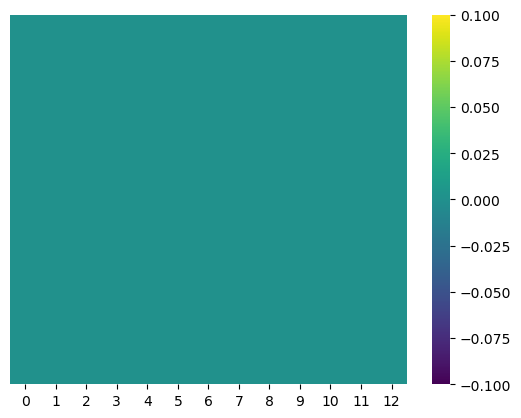

In [16]:
# This heatmap indicates that our data is free from null values
sns.heatmap(df.isnull().values,yticklabels = False , cmap = 'viridis')

In [17]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,144.917757,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


In [18]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [19]:
# detailed EDA
columns = ['Loan_Status','Gender', 'Married', 'Dependents', 'Education','Self_Employed','Loan_Status','Property_Area']
for i in columns:

    df2 = df.groupby(i)['Loan_ID'].count()
    print(df2)
   

Loan_Status
N    172
Y    382
Name: Loan_ID, dtype: int64
Gender
Female    101
Male      453
Name: Loan_ID, dtype: int64
Married
No     192
Yes    362
Name: Loan_ID, dtype: int64
Dependents
0     319
1      95
2      94
3+     46
Name: Loan_ID, dtype: int64
Education
Graduate        431
Not Graduate    123
Name: Loan_ID, dtype: int64
Self_Employed
No     478
Yes     76
Name: Loan_ID, dtype: int64
Loan_Status
N    172
Y    382
Name: Loan_ID, dtype: int64
Property_Area
Rural        163
Semiurban    211
Urban        180
Name: Loan_ID, dtype: int64


In [20]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

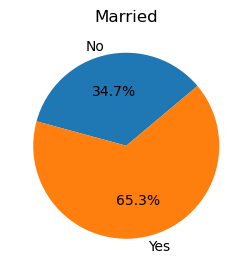

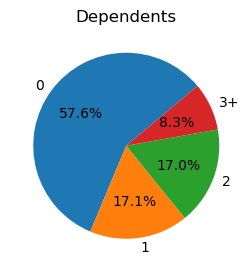

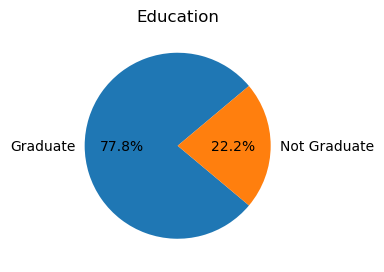

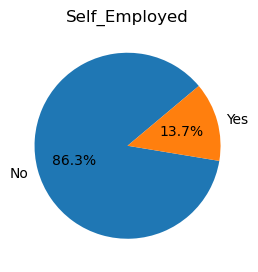

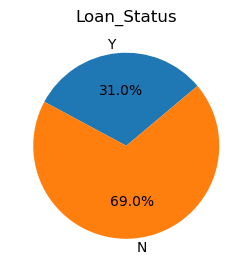

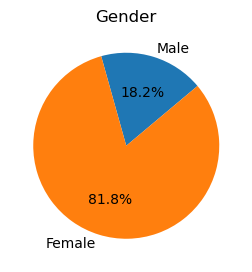

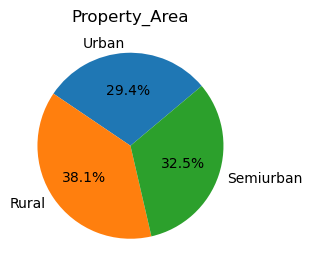

In [21]:
# from statistics point of view, categorical variables are analysed graphically by use of either 
#pie chart or bar graph. Pie chart to show proportion of the categorical variables in our data.
columns = ['Married', 'Dependents', 'Education','Self_Employed','Loan_Status','Gender','Property_Area']
for i in columns:
    plt.figure(figsize=(3,4))
    plt.pie(data=df,x=df.groupby(i)['Loan_ID'].count(),autopct = '%.1f%%',startangle = 40,labels = df[i].unique())
    plt.title(i)
    

In [22]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [23]:
# descriptive analysis for various continous features
columns = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount','Loan_Amount_Term', 'Credit_History']
for i in columns:
    mean = df[i].mean()
    print('The average of ' + i + ' is:', round(mean,2))
    

The average of ApplicantIncome is: 5267.06
The average of CoapplicantIncome is: 1585.58
The average of LoanAmount is: 144.92
The average of Loan_Amount_Term is: 341.96
The average of Credit_History is: 0.84


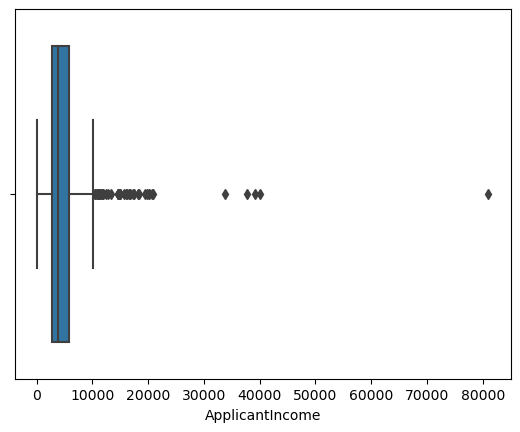

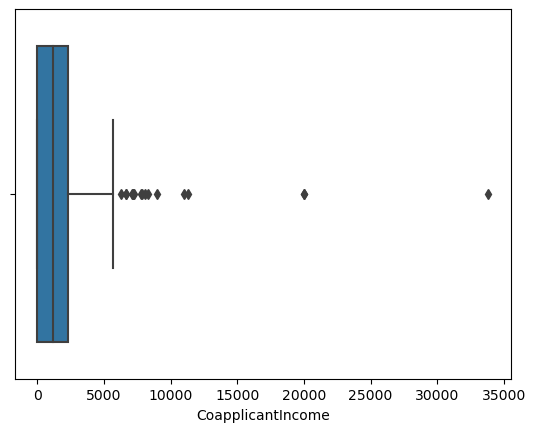

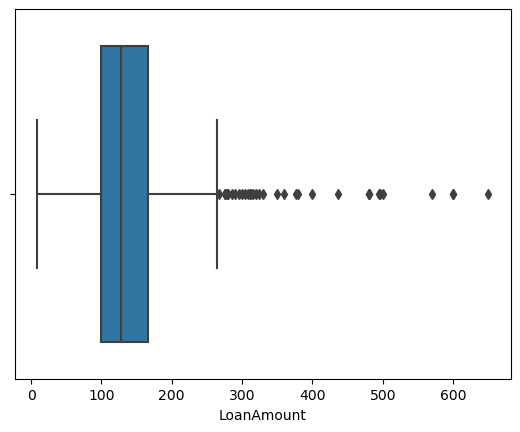

In [24]:
# box plots to check the outliers in our continous variables
columns = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']
for i in columns:
    plt.figure()
    sns.boxplot(data = df, x= i)

In [25]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,144.917757,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


In [26]:
df['Dependents'].unique()

array(['0', '1', '2', '3+'], dtype=object)

In [27]:
# extracting dummy values from some variables
gender = pd.get_dummies(df['Gender'],drop_first = True,prefix = 'gender')
married = pd.get_dummies(df['Married'],drop_first = True,prefix = 'married')
dependents = pd.get_dummies(df['Dependents'],drop_first = True,prefix = 'dependents')
education = pd.get_dummies(df['Education'],drop_first = True,prefix = 'education')
selfemployed = pd.get_dummies(df['Self_Employed'],drop_first = True,prefix = 'selfemployed')
propertyarea = pd.get_dummies(df['Property_Area'],drop_first = True,prefix = 'propertyarea')
loanstatus = pd.get_dummies(df['Loan_Status'],drop_first = True,prefix = 'loanstatus')


In [28]:
loanstatus.head()

,loanstatus_Y
0,1
1,0
2,1
3,1
4,1


In [29]:
dependents.columns = dependents.columns.astype(str)
dependents.columns

Index(['dependents_1', 'dependents_2', 'dependents_3+'], dtype='object')

In [30]:
df1 = pd.concat([df,gender,married,dependents,education,selfemployed,propertyarea,loanstatus],axis = 1)

In [31]:
df1.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,...,gender_Male,married_Yes,dependents_1,dependents_2,dependents_3+,education_Not Graduate,selfemployed_Yes,propertyarea_Semiurban,propertyarea_Urban,loanstatus_Y
0,LP001002,Male,No,0,Graduate,No,5849,0.0,144.917757,360.0,...,1,0,0,0,0,0,0,0,1,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,...,1,1,1,0,0,0,0,0,0,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,...,1,1,0,0,0,0,1,0,1,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,...,1,1,0,0,0,1,0,0,1,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,...,1,0,0,0,0,0,0,0,1,1


In [32]:
df1.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'gender_Male', 'married_Yes', 'dependents_1', 'dependents_2',
       'dependents_3+', 'education_Not Graduate', 'selfemployed_Yes',
       'propertyarea_Semiurban', 'propertyarea_Urban', 'loanstatus_Y'],
      dtype='object')

In [33]:
df1.drop(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education','Self_Employed','Property_Area', 'Loan_Status'],
        axis = 1,inplace = True)

In [34]:
df1.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,gender_Male,married_Yes,dependents_1,dependents_2,dependents_3+,education_Not Graduate,selfemployed_Yes,propertyarea_Semiurban,propertyarea_Urban,loanstatus_Y
0,5849,0.0,144.917757,360.0,1.0,1,0,0,0,0,0,0,0,1,1
1,4583,1508.0,128.000000,360.0,1.0,1,1,1,0,0,0,0,0,0,0
2,3000,0.0,66.000000,360.0,1.0,1,1,0,0,0,0,1,0,1,1
3,2583,2358.0,120.000000,360.0,1.0,1,1,0,0,0,1,0,0,1,1
4,6000,0.0,141.000000,360.0,1.0,1,0,0,0,0,0,0,0,1,1


In [35]:
df1['ApplicantIncome'].max()

81000

In [36]:
X= df1.iloc[:,:-1]
y = df1['loanstatus_Y']

In [37]:
y.head()

0    1
1    0
2    1
3    1
4    1
Name: loanstatus_Y, dtype: uint8

## Predictive Analysis

In [38]:
# splitting our data into training set and test test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3,random_state = 13)

In [39]:
#from sklearn.preprocessing import StandardScaler

In [117]:
#scaler = StandardScaler()
#X_train = scaler.fit_transform(X_train)
#X_test = scaler.transform(X_test)


### Testing the accuracy score of different categorical supervised model and choosing 
### one with highest accuracy score.

In [118]:
# Logistic Regression model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model = model.fit(X_train,y_train)
y_pred = model.predict(X_test)
from sklearn.metrics import accuracy_score
round(accuracy_score(y_pred,y_test)*100,2)

79.04

In [42]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0], dtype=uint8)

In [103]:
# Decision Tree 
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model = model.fit(X_train,y_train)
y_pred = model.predict(X_test)
from sklearn.metrics import accuracy_score
round(accuracy_score(y_pred,y_test)*100,2)

70.06

In [105]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model = model.fit(X_train,y_train)
y_pred = model.predict(X_test)
from sklearn.metrics import accuracy_score
round(accuracy_score(y_pred,y_test)*100,2)

79.64

In [106]:
# Support Vector Machine
from sklearn.svm import SVC
model = SVC()
model = model.fit(X_train,y_train)
y_pred = model.predict(X_test)
from sklearn.metrics import accuracy_score
round(accuracy_score(y_pred,y_test)*100,2)

67.66

In [107]:
# K Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
model = model.fit(X_train,y_train)
y_pred = model.predict(X_test)
from sklearn.metrics import accuracy_score
round(accuracy_score(y_pred,y_test)*100,2)

63.47

In [43]:
df1

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,gender_Male,married_Yes,dependents_1,dependents_2,dependents_3+,education_Not Graduate,selfemployed_Yes,propertyarea_Semiurban,propertyarea_Urban,loanstatus_Y
0,5849,0.000000,144.917757,360.00000,1.000000,1,0,0,0,0,0,0,0,1,1
1,4583,1508.000000,128.000000,360.00000,1.000000,1,1,1,0,0,0,0,0,0,0
2,3000,0.000000,66.000000,360.00000,1.000000,1,1,0,0,0,0,1,0,1,1
3,2583,2358.000000,120.000000,360.00000,1.000000,1,1,0,0,0,1,0,0,1,1
4,6000,0.000000,141.000000,360.00000,1.000000,1,0,0,0,0,0,0,0,1,1
5,5417,4196.000000,267.000000,360.00000,1.000000,1,1,0,1,0,0,1,0,1,1
6,2333,1516.000000,95.000000,360.00000,1.000000,1,1,0,0,0,1,0,0,1,1
7,3036,2504.000000,158.000000,360.00000,0.000000,1,1,0,0,1,0,0,1,0,0
8,4006,1526.000000,168.000000,360.00000,1.000000,1,1,0,1,0,0,0,0,1,1
9,12841,10968.000000,349.000000,360.00000,1.000000,1,1,1,0,0,0,0,1,0,0


In [44]:
df1.columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'gender_Male', 'married_Yes',
       'dependents_1', 'dependents_2', 'dependents_3+',
       'education_Not Graduate', 'selfemployed_Yes', 'propertyarea_Semiurban',
       'propertyarea_Urban', 'loanstatus_Y'],
      dtype='object')

In [45]:
import warnings
warnings.filterwarnings('ignore')

In [46]:
model.predict([[1928,1644,100,360,1,0,1,0,0,0,1,0,1,0]])

array([1], dtype=uint8)

In [127]:
# we choose Random Forest being the one with highest accuracy score of 79.64% 
# and come up with a function to design our model look more attractive.
def loanmodel():
    name = str(input('Enter your first name: '))
    ApplicantIncome = float(input('Enter your monthly Income: '))
    Coapplicantincome = float(input("Enter your guarantors' monthly Income: "))
    LoanAmount = float(input('Enter Loan Amount: '))
    LoanTerm = float(input('Enter Loan Term: '))
    CreditHistory = float(input('Enter the credit history: '))
    gender = float(input('Select your gender: '
                        '1: Male '
                        '0: Female '))
    married = float(input('Marital Status: '
                         '1: Married '
                         '0: Single '))
    dependent1 = float(input('Do you only have one dependent? '
                            '1: Yes '
                            '0: No '))
    dependents2 = float(input('Do you only two depedents? '
                             '1: Yes '
                             '0: No '))
    dependents3p = float(input('Do you have 3 or more dependents? '
                              '1: Yes '
                              '0: No '))
    education = float(input("What's your education level? "
                           '1: Graduate '
                           '0: Ungraduate '))
    selfemployed = float(input('Are you self-employed? '
                              '1: Yes '
                              '0: No '))
    propertyareasemi = float(input('Do you reside in a semi-urban area? '
                                  '1: Yes '
                                  '0: No '))
    propertyurban = float(input('Do you reside in urban area? '
                               '1: Yes '
                               '0: No '))
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3,random_state = 13)
    from sklearn.ensemble import RandomForestClassifier
    model = RandomForestClassifier()
    model = model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    from sklearn.metrics import accuracy_score
    #round(accuracy_score(y_pred,y_test)*100,2)
    predictions = model.predict([[ApplicantIncome,Coapplicantincome,LoanAmount,LoanTerm,CreditHistory,
                                 gender,married,dependent1,dependents2,dependents3p,education,selfemployed,
                                 propertyareasemi,propertyurban]])
    if predictions == 0:
        loanlimit = 0
        loan_limit = str(loanlimit)
        print('Dear ' + name +', you are not eligible for the requested loan amount.'
              'Your Loan Limit is ksh.' + loan_limit +'.'
              'For any enquiry, contact 0741875151' )
    else:
        loanlimit = (LoanAmount*0.15) + LoanAmount
        loan_limit = str(loanlimit)
        print('Dear ' + name +', you are eligible for the requested loan amount.'
             'Your Loan Limit is ksh ' + loan_limit +'. '
             'For any enquiry, contact 0741875151')
    
    

In [128]:
# calling our model and doing some test
loanmodel()

Enter your first name: Peter
Enter your monthly Income: 3000
Enter your guarantors' monthly Income: 2000
Enter Loan Amount: 1000
Enter Loan Term: 360
Enter the credit history: 1
Select your gender: 1: Male 0: Female 1
Marital Status: 1: Married 0: Single 0
Do you only have one dependent? 1: Yes 0: No 0
Do you only two depedents? 1: Yes 0: No 1
Do you have 3 or more dependents? 1: Yes 0: No 0
What's your education level? 1: Graduate 0: Ungraduate 1
Are you self-employed? 1: Yes 0: No 0
Do you reside in a semi-urban area? 1: Yes 0: No 1
Do you reside in urban area? 1: Yes 0: No 0
Dear Peter, you are eligible for the requested loan amount.Your Loan Limit is ksh 1150.0. For any enquiry, contact 0741875151
